# 0. OpenCV with contrib libraries

In [ ]:
!pip install opencv-contrib-python opencv-python

# 1. Download data 
from [this kaggle dataset](https://www.kaggle.com/pmigdal/alien-vs-predator-images). Unpack it to some folder.

Use the following code to read the data. The data will be stored in the following arrays:
- `X_train`, `X_test` - lists of 2D `np.array`s storing grayscaled images.
- `y_train`, `y_test` - lists of text labels (`alien`, `predator`).

In [33]:
dataset_dir = "C:/dev/datasets/avsp/data"

import cv2
import os

def load_dataset_part(folder):
    result = []
    for i in os.listdir(folder):
        fn = os.path.join(folder, i)
        if os.path.isfile(fn):
            img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)
            result.append(img)
    return result


def load_dataset(folder, train=True):
    part = 'train' if train else 'validation'
    aliens = load_dataset_part(os.path.join(folder, part, 'alien'))
    predators = load_dataset_part(os.path.join(folder, part, 'predator'))
    X = aliens + predators
    y = ['alien'] * len(aliens) + ['predator'] * len(predators)
    return X, y
    
X_train, y_train = load_dataset(os.path.join(dataset_dir))
X_test, y_test = load_dataset(os.path.join(dataset_dir), train=False)

print(f"Train size {len(X_train)}, Test size {len(X_test)}")

Train size 694, Test size 200


alien


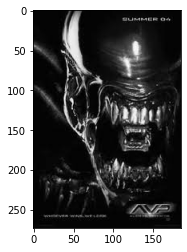

predator


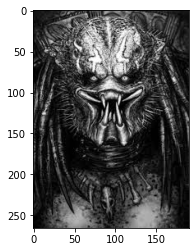

In [34]:
import matplotlib.pyplot as plt

print(y_train[13])
plt.imshow(X_train[13], cmap='gray')
plt.show()

print(y_train[-13])
plt.imshow(X_train[-13], cmap='gray')
plt.show()

# 2. Compute SIFT desciptors
Compute SIFT descriptors for every image. You can use `detectAndCompute(...)` method, please refer to documentation or, e.g. [this tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html). 

**NB Each image will produce unpredictable (different) number of SIFT vectors. Store them in matrices**

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
X_train_sift = ...
X_test_sift = ...

Sample vector 0 of 13th image:

In [37]:
print(X_train_sift[13][0])

[ 84.   2.   1.   0.   0.   0.   0.   8. 164.   1.   0.   1.  24.   7.
   1.  47.  18.   0.   0.  12. 164.  20.   1.  10.   0.   0.   0.   4.
  61.   3.   0.   0. 121.   3.   0.   0.   0.   0.   0.  11. 164.   6.
   0.   0.  32.  23.   5.  60.  30.   0.   0.   0. 164. 110.   5.  16.
   0.   0.   0.   0.  75.  24.   0.   0.  93.  17.   0.   0.   0.   0.
   0.   4. 164.  76.   0.   0.  20.  14.   1.   7.  60.  12.   0.   0.
 164. 109.   1.   4.   0.   0.   0.   0.  27.  17.   0.   0.  22.  19.
   1.   0.   1.   0.   0.   1.  91.  74.   0.   0.   0.   1.   0.   0.
  12.  10.   0.   0.   2.   4.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


# 3. Organize these vectors in the index (somehow)

I personally used the following strategy:
- I numerate all vectors. `labels` array stores image index for a vector.
- Vector itself is a key, vector's index `c` thoughout all the vectors is value. 
- Then, `labels[c]` will return image index.
- I query the index with a vector `v` and recieve `c`.
- Thus, `y_train[labels[c]]` is a class of the images, described by the vector `v`.

In [11]:
from tqdm import tqdm
from annoy import AnnoyIndex
index = AnnoyIndex(128, 'angular')  
# ...

100%|██████████| 694/694 [00:06<00:00, 111.43it/s]



added
done


# 3. Classification

Implement the best possible classifier function to your knowledge. Utilize all the data from the index and datasets. E.g.
- if you set `include_distances=True` in Annoy search, it will also add distances in search results.
- How many times each particular image was present in matches?
- What about k-nn approach?
- What about training a classifier based on vectors?
- How about filtering out some useless vectors?
- and so on...

In [44]:
from collections import Counter

def clf(vecs, index, labels, classes, n=50):
    # my very simple classifier lived here. Can you do better?
    # write your code and change the method signature in needed
    ...
    return classes[idx]

## Test
Use these blocks to test your results. Pay attention to `accuracy` value. For me this is `0.74`. You can definitely do better :)

In [45]:
predictions = []
for sample in tqdm(X_test_sift):
    predictions.append(clf(sample, index, labels, y_train))

100%|██████████| 200/200 [00:42<00:00,  4.71it/s]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       alien       0.82      0.62      0.70       100
    predator       0.69      0.86      0.77       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



## Submission
Show your implementation and classification report to your TA. Observe your results [by the link](https://docs.google.com/spreadsheets/d/1fMPx7_JwKwuds82EYJSmKnIeOM4JLG0QEeXB_6NG2x8/edit?usp=sharing).

**NB SUBMIT YOUR SOLUTIONS WITH CLASSIFICATION REPORT TO MOODLE BY MIDNIGHT**